# 逻辑回归从零开始实现

In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt

## 1 人工构造数据集 以及读取数据

In [4]:
n_data = torch.ones(50, 2) # 数据的基本形态
x1 = torch.normal(2 * n_data, 1) # shape=(50, 2)
y1 = torch.zeros(50) # 类型0 shape=(50, 1)
x2 = torch.normal(-2 * n_data, 1) # 类型1 shape=(50, 2)
y2 = torch.ones(50) # 类型1 shape=(50, 1)
# 注意 x, y 数据的数据形式是一定要像下面一样 (torch.cat 是在合并数据)
# 将数据分为训练集和验证集 20%为验证集
X_train = torch.cat((x1[10:], x2[10:]), 0).type(torch.FloatTensor)
y_train = torch.cat((y1[10:], y2[10:]), 0).type(torch.FloatTensor)
# 验证集
X_test = torch.cat((x1[:10], x2[:10]), 0).type(torch.FloatTensor)
y_test = torch.cat((y1[:10], y2[:10]), 0).type(torch.FloatTensor)

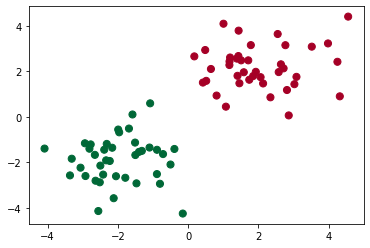

In [5]:
plt.scatter(X_train.data.numpy()[:, 0], X_train.data.numpy()[:, 1], c=y_train.data.numpy(), s=50, cmap='RdYlGn')
plt.show()

In [6]:
num_inputs = 2
def data_iter(batch_size, features, labels):
    num_examples = len(features)
    indices = list(range(num_examples))
    np.random.shuffle(indices)
    for i in range(0, num_examples, batch_size):
        j = torch.LongTensor(indices[i: min(i + batch_size, num_examples)])
        yield features.index_select(0, j), labels.index_select(0, j)

## 2 初始化模型参数

In [7]:
w = torch.tensor(np.random.normal(0, 0.01, (num_inputs, 1)), dtype=torch.float32, requires_grad=True)
b = torch.zeros(1, dtype=torch.float32, requires_grad=True)
w, b

(tensor([[-0.0050],
         [-0.0064]], requires_grad=True), tensor([0.], requires_grad=True))

## 3 定义模型

In [8]:
def sigmoid(z):
    return 1 / (1 + torch.exp(-z))


def logical(X, w, b):
    return sigmoid(torch.mm(X, w) + b)

In [11]:
logical(X_train, w, b) # 检测是否错误

tensor([[0.4950],
        [0.4957],
        [0.4953],
        [0.4927],
        [0.4955],
        [0.4948],
        [0.4958],
        [0.4949],
        [0.4933],
        [0.4932],
        [0.4947],
        [0.4915],
        [0.4872],
        [0.4946],
        [0.4952],
        [0.4910],
        [0.4949],
        [0.4975],
        [0.4970],
        [0.4946],
        [0.4946],
        [0.4930],
        [0.4936],
        [0.4963],
        [0.4968],
        [0.4906],
        [0.4939],
        [0.4932],
        [0.4941],
        [0.4958],
        [0.4979],
        [0.4921],
        [0.4898],
        [0.4921],
        [0.4939],
        [0.4941],
        [0.4939],
        [0.4943],
        [0.4908],
        [0.4944],
        [0.5034],
        [0.5004],
        [0.5065],
        [0.5060],
        [0.5028],
        [0.5078],
        [0.5040],
        [0.5099],
        [0.5046],
        [0.5053],
        [0.5084],
        [0.5065],
        [0.5066],
        [0.5060],
        [0.5071],
        [0

## 4 定义优化算法

In [12]:
def sgd(params, lr, batch_size):
    for param in params:
        param.data -= lr * param.grad / batch_size

## 5 定义损失函数

In [13]:
# 定义二元交叉熵函数
def Cross_Entropy_loss(y_hat, y, batch_size):
    return -1/batch_size * ((y.view(y_hat.shape) * torch.log(y_hat) + (1 - y.view(y_hat.shape)) * torch.log(1 - y_hat)).sum())

In [17]:
loss = Cross_Entropy_loss(logical(X_train, w, b), y_train, X_train.shape[0])
loss

tensor(0.6817, grad_fn=<MulBackward0>)

## 6 训练模型

In [14]:
def predict(X, w, b):
    Pre = net(X, w, b)
    result = []
    for p in Pre:
        if p > 0.5:
            result.append(1)
        else:
            result.append(0)
    return result

In [15]:
def accuracy(X, y, w, b): 
    pred = torch.tensor(predict(X, w, b))
    L = (pred == y).float().mean().item()
    return L

In [20]:
lr = 0.1
num_epochs = 300
net = logical
loss = Cross_Entropy_loss
batch_size = 40
loss_train = []
loss_test = []
acc_train = []
acc_test = []
for epoch in range(num_epochs):
    for datas, labels in data_iter(batch_size, X_train, y_train):
        l = loss(net(datas, w, b), labels, batch_size)
        l.backward()
        sgd([w, b], lr, batch_size)
        w.grad.data.zero_()
        b.grad.data.zero_()
        
    #记录每一个epoch的值    
    train_l = loss(net(X_train, w, b), y_train, X_train.shape[0])
    loss_train.append(train_l.item())
    train_acc = accuracy(X_train, y_train, w, b)
    acc_train.append(train_acc * 100)
    
    loss_test.append(loss(net(X_test, w, b), y_test, X_test.shape[0]).item())
    acc_test.append(accuracy(X_test, y_test, w, b) * 100)
    print('epoch %d, loss_train: %f, acc_train: %.f' % (epoch + 1, train_l.item(), train_acc * 100), '%')
#     print('epoch %d, loss_train: %f' % (epoch + 1, train_l.item()))

epoch 1, loss_train: 0.122477, acc_train: 100 %
epoch 2, loss_train: 0.122177, acc_train: 100 %
epoch 3, loss_train: 0.121879, acc_train: 100 %
epoch 4, loss_train: 0.121582, acc_train: 100 %
epoch 5, loss_train: 0.121287, acc_train: 100 %
epoch 6, loss_train: 0.120993, acc_train: 100 %
epoch 7, loss_train: 0.120701, acc_train: 100 %
epoch 8, loss_train: 0.120411, acc_train: 100 %
epoch 9, loss_train: 0.120122, acc_train: 100 %
epoch 10, loss_train: 0.119835, acc_train: 100 %
epoch 11, loss_train: 0.119550, acc_train: 100 %
epoch 12, loss_train: 0.119266, acc_train: 100 %
epoch 13, loss_train: 0.118983, acc_train: 100 %
epoch 14, loss_train: 0.118702, acc_train: 100 %
epoch 15, loss_train: 0.118423, acc_train: 100 %
epoch 16, loss_train: 0.118145, acc_train: 100 %
epoch 17, loss_train: 0.117868, acc_train: 100 %
epoch 18, loss_train: 0.117593, acc_train: 100 %
epoch 19, loss_train: 0.117320, acc_train: 100 %
epoch 20, loss_train: 0.117048, acc_train: 100 %
epoch 21, loss_train: 0.11677

## 7 结果可视化

In [22]:
Res = predict(X_test, w, b)

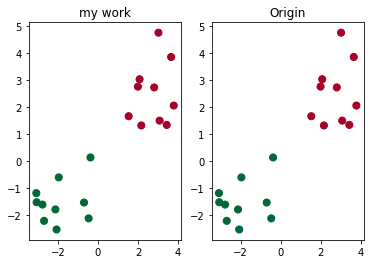

In [24]:
plt.subplot(1, 2, 1)
plt.scatter(X_test.data.numpy()[:, 0], X_test.data.numpy()[:, 1], c=Res, s=50, cmap='RdYlGn')
plt.title('my work')
plt.subplot(1, 2, 2)
plt.scatter(X_test.data.numpy()[:, 0], X_test.data.numpy()[:, 1], c=y_test.data.numpy(), s=50, cmap='RdYlGn')
plt.title('Origin')
plt.show()

Text(0.5, 1.0, 'acc_test')

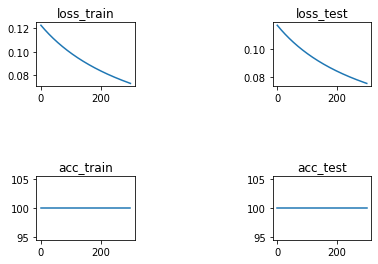

In [25]:
plt.subplot(3,3,1)
plt.plot(range(num_epochs), loss_train)
plt.title('loss_train')
plt.subplot(3,3,3)
plt.plot(range(num_epochs), loss_test)
plt.title('loss_test')
plt.subplot(3,3,7)
plt.plot(range(num_epochs), acc_train)
plt.title('acc_train')
plt.subplot(3,3,9)
plt.plot(range(num_epochs), acc_test)
plt.title('acc_test')